In [3]:
"""
First iPython notebook. We will attempt to find all non-intersecting paths of length
n*n in an n-by-n grid.
"""
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Xiao's code for defining a square grid or matrix of size n.
def matrix_maker(n):
    return np.zeros((n,n), dtype=np.int)

In [35]:
# Test the output of matrix_maker
n = 4
x = matrix_maker(n)
x

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [47]:
# Let us identify the entries (nodes) of the matrix in the normal sense, beging at the upper left corner, working
# along the rows.
count = 0

for i in range(n):
    for j in range(n):
        count = count + 1
        x[i,j] = count
        
x

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [37]:
# We may want to take advantage of reshaping the matrix, this can be done easily in Python as follows.
x.reshape(1,n*n)

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]])

In [56]:
# With the matrix entries (nodes) identified in the normal sense, we can define the adjacency matrix in the sense
# of a simple square lattice in graph theory. This matrix tells us the possible next options from the node we are on
# by the 1's along the row or column.
def adjacency_matrix(rows, cols):
    n = rows*cols
#     M = matrix(n,n)
    M = np.zeros((n,n), dtype=np.int)
    for r in range(rows):
        for c in range(cols):
            i = r*cols + c
            # Two inner diagonals
            if c > 0: M[i-1,i] = M[i,i-1] = 1
            # Two outer diagonals
            if r > 0: M[i-cols,i] = M[i,i-cols] = 1
    return M

In [58]:
# Test the creation of the adjacency matrix given the elementry/node matrix.
adjacency_x = adjacency_matrix(x.shape[0],x.shape[1])
adjacency_x

array([[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]])

In [144]:
# Below are Xiao's rules for next possible move in defining a path within the grid/matrix. 
def next_move(i,j,x):
    #Find out size of matrix:
    n = np.shape(x)[0] - 1
    
    #Empty for moves
    moves = []
    
    #Boundary Conditions: (i = 0 or n, j = 0 or n)
    if i == 0 and j > 0 and j < n:
        if x[i, j-1] == 0:
            moves.append((i, j-1))
        if x[i, j+1] == 0:
            moves.append((i, j+1))
        if x[i+1, j] == 0:
            moves.append((i+1, j))
            
    elif i == n and j > 0 and j < n:
        if x[i, j-1] == 0:
            moves.append((i, j-1))
        if x[i, j+1] == 0:
            moves.append((i, j+1))
        if x[i-1, j] == 0:
            moves.append((i-1, j))
            
    elif i > 0 and i < n and j == 0:
        if x[i-1, j] == 0:
            moves.append((i-1, j))
        if x[i+1, j] == 0:
            moves.append((i+1, j))
        if x[i, j+1] == 0:
            moves.append((i, j+1))
        
    elif i > 0 and i < n and j == n:
        if x[i-1, j] == 0:
            moves.append((i-1, j))
        if x[i+1, j] == 0:
            moves.append((i+1, j))
        if x[i, j-1] == 0:
            moves.append((i, j-1))
        
    #Corners:
    elif i == 0 and j == 0:
        if x[i, j+1] == 0:
            moves.append((i, j+1))
        if x[i+1, j] == 0:
            moves.append((i+1, j))
    
    elif i == 0 and j == n:
        if x[i, j-1] == 0:
            moves.append((i, j-1))
        if x[i+1, j] == 0:
            moves.append((i+1, j))
    
    elif i == n and j == 0:
        if x[i, j+1] == 0:
            moves.append((i, j+1))
        if x[i-1, j] == 0:
            moves.append((i-1, j))
    
    elif i == n and j == n:
        if x[i, j-1] == 0:
            moves.append((i, j-1))
        if x[i-1, j] == 0:
            moves.append((i-1, j))
    
    #Rest of the cells:
    elif i > 0 and i < n and j > 0 and j < n:
        if x[i-1, j] == 0:
            moves.append((i-1, j))
        if x[i+1, j] == 0:
            moves.append((i+1, j))
        if x[i, j-1] == 0:
            moves.append((i, j-1))
        if x[i, j+1] == 0:
            moves.append((i, j+1))
    else:
        print("Error")
        pass
    
    
    return moves

In [213]:
#Record Keeping:
routes = []
fails = 0
unique_runs = []

###### INPUTS ######
n = 3
runs = 100

for r in range(runs):
    x = matrix_maker(n)
    x[0, 0] = 1
    s = [0,0]    
    
    for i in np.arange(1,n*n):
        moves = next_move(s[0], s[1], x)

        if not moves:        
                fails += 1
                break

        n_move = random.choice(moves)
        s = [n_move[0], n_move[1]]
        x[n_move[0], n_move[1]] = i + 1
        
        if x[n_move[0], n_move[1]] == n*n:
            routes.append(x.flatten())
            break
            
unique_runs = [list(x) for x in set(tuple(x) for x in routes)]
print("There are %i unique runs" %(len(unique_runs)))
print("Success rate %4.2f" %(len(routes) / runs))

There are 8 unique runs
Success rate 0.54


In [ ]:
### Bit of testing:

accuracy=[]

for runs in np.arange(1000,20000,1000):
    temp = []
    for j in range(10):
        #Record Keeping:
        routes = []
        fails = 0
        unique_runs = []

        ###### INPUTS ######
        n = 4

        for r in range(runs):
            x = matrix_maker(n)
            x[0, 0] = 1
            s = [0,0]    

            for i in np.arange(1,n*n):
                moves = next_move(s[0], s[1], x)

                if not moves:        
                        fails += 1
                        break

                n_move = random.choice(moves)
                s = [n_move[0], n_move[1]]
                x[n_move[0], n_move[1]] = i + 1

                if x[n_move[0], n_move[1]] == n*n:
                    routes.append(x.flatten())
                    break

        unique_runs = [list(x) for x in set(tuple(x) for x in routes)]
        temp.append(len(unique_runs) / 60)
    
    accuracy.append(sum(temp) / float(len(temp)))

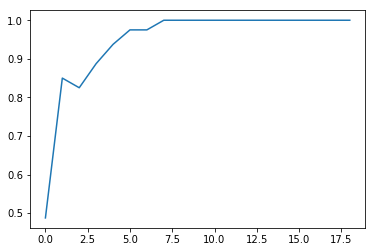

In [221]:
plt.plot(accuracy)

In [223]:
x

array([[ 1, 12, 13, 14],
       [ 2, 11, 10,  9],
       [ 3,  0,  0,  8],
       [ 4,  5,  6,  7]])